## **Wine Quality Prediction using Machine learning**

-----------------------------------------------Description------------------------------------------------

The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.

Date : 4 sept 2024
by: Rani Soni

#### importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### loading the dataset

In [2]:
data = pd.read_csv('WineQuality.csv')

In [3]:
# first 5 rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
## last 5 rows of the dataset
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


### Exploratory Data Analysis

In [5]:
# the totral no. number of rows & columns in the dataset
data.shape

(1143, 13)

In [6]:
#printing the shape
print("the no. of rows are:",data.shape[0])
print("the no. of columns are: ",data.shape[1])

the no. of rows are: 1143
the no. of columns are:  13


In [7]:
#Information About Our Dataset Like
#the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [9]:
#to Get Overall Statistics About The Dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### data cleaning

In [10]:
#it will sum up all the null values of the dataset
data.isnull().sum()
#no data cleaning is required

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [11]:
#there is no use of id in prediction model
data = data.drop(['Id'],axis=1)

#### Data Analysis and Visulaization

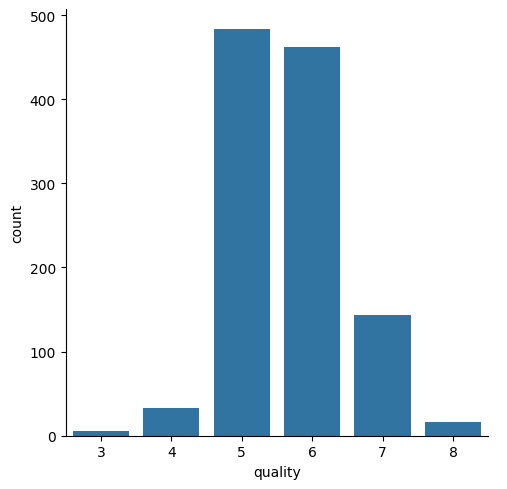

In [12]:
#1.................. the total number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

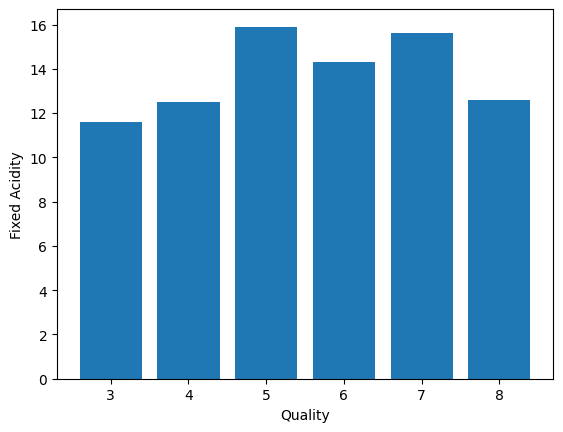

In [13]:
##2................ QUALITY VS FIXED ACIDITY
plt.bar(data['quality'],data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

we can tell by this graph that by increasing the fixed acidity the quality of the wine improves

<Axes: xlabel='quality', ylabel='volatile acidity'>

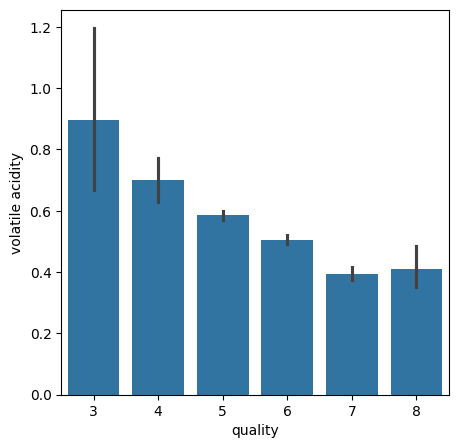

In [14]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = data)

there is a inverse relation between the volatile acidity and quality

<Axes: xlabel='quality', ylabel='residual sugar'>

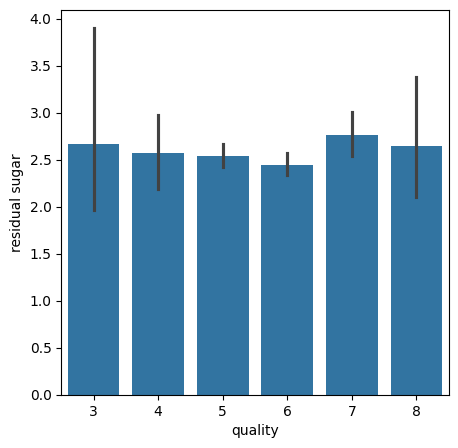

In [15]:
#4....................Residual sugar vs QUALITY
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = data)

there is no certain effect of residual sugar on the quality

<Axes: xlabel='quality', ylabel='citric acid'>

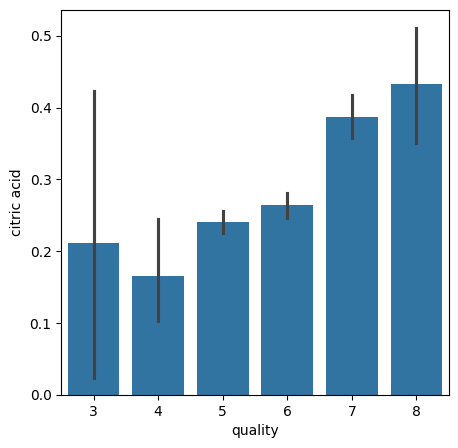

In [16]:
#5.......................... citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = data)

it shows a directly proportional relation between citric acid and quality

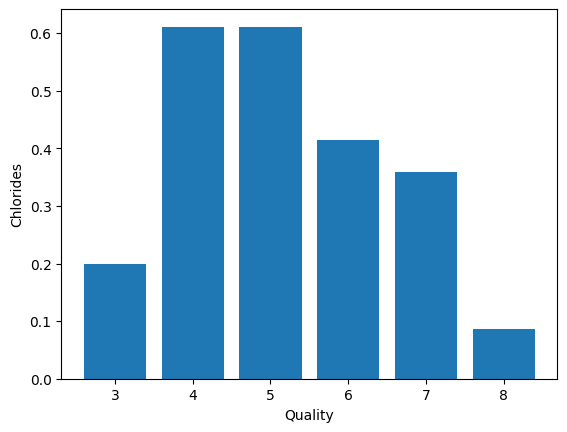

In [17]:
#6.........................CHLORIDES VS QUALITY
plt.bar(data['quality'],data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

by less quantity of chlorides the quality of wine is better

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

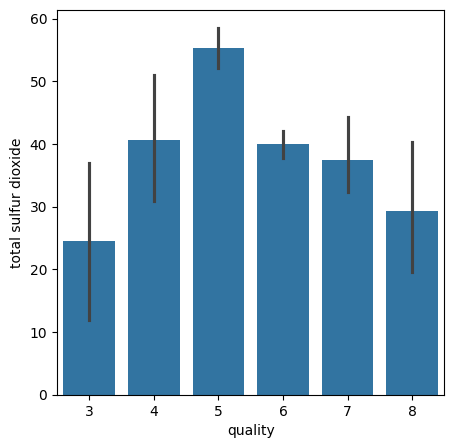

In [18]:
#7................TOTAL SULPHUR DIOXIDE VS QUALITY
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = data)

quality of wine does not have any significant direct relation with sulphur dioxide 

<Axes: xlabel='quality', ylabel='alcohol'>

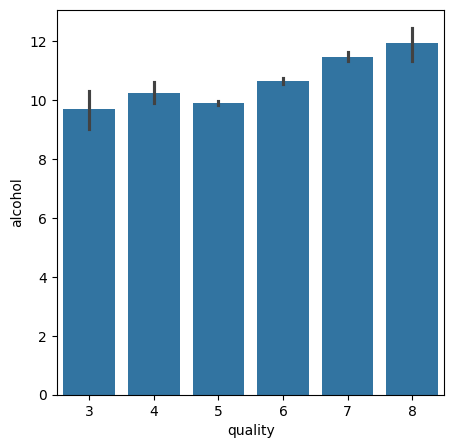

In [19]:
#8.......................ALCOHOL VS QUALITY
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = data)

the quality of wine increases with increase in the amount of alcohol

In [20]:
#9................sulphates vs quality

<Axes: xlabel='quality', ylabel='sulphates'>

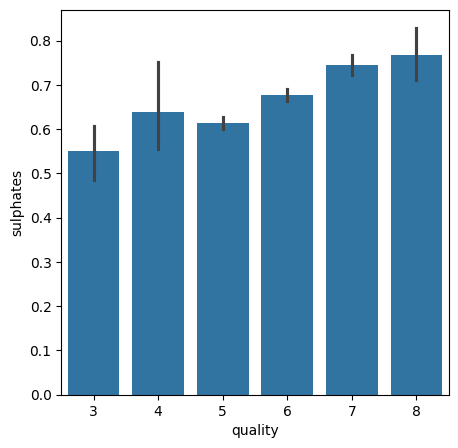

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = data)

there is a direct proportionality relation between sulphates and quality

#### CORRELATION MATRIX

In [22]:
correlation = data.corr()

<Axes: >

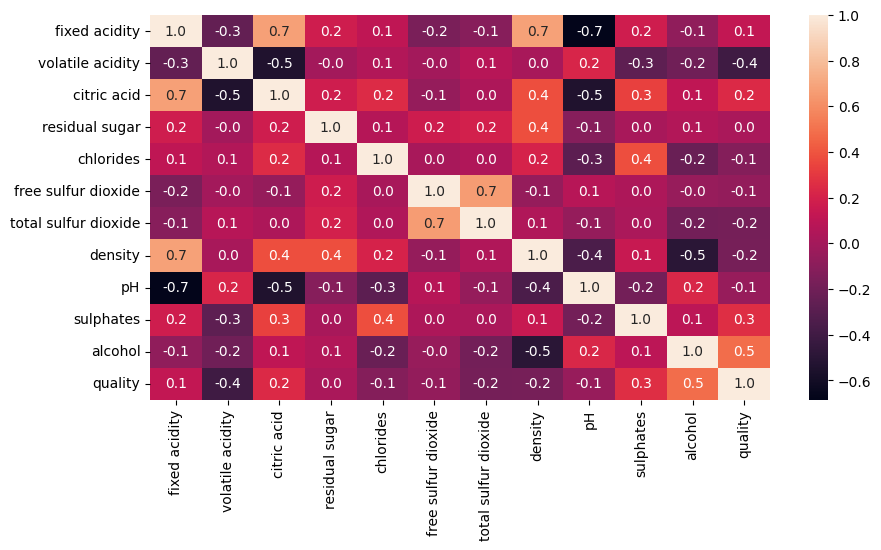

In [23]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,5))
sns.heatmap(correlation, fmt = '.1f', annot = True)

### Binarization of Target Variable

In [24]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [25]:
#we need to change it in the form of 0,1
data['quality']=[1 if x>=6.5 else 0 for x in data['quality']]

In [26]:
data['quality'].unique()
#now you can see there are only two values in quality column i.e. 0&1
#0 means that quality is bad and 1 means quality is good 

array([0, 1], dtype=int64)

In [27]:
#now check how many are good quality and how many bad
data['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

<Axes: ylabel='quality'>

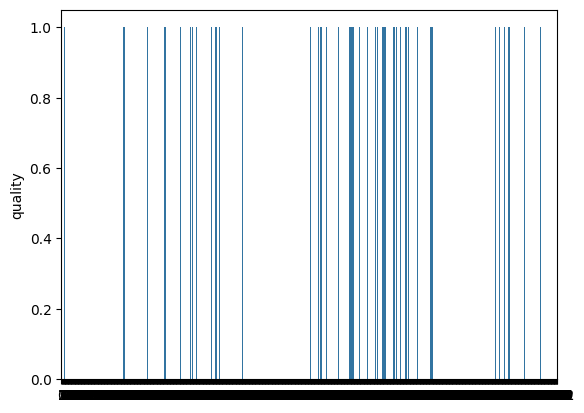

In [28]:
sns.barplot(data['quality'])

THE DATA IS UNBALANCED WHICH MEANS THAT THE NUMBER OF BAD OUALITY WINE IS SIGNIFACTLY HIGH THAN THE GOOD QUALITY WINE


### Handling Imbalanced data
we have mainly two techniques 1. over sampling 2. under sampling
#### oversampling: it is basically to oversample the minority class using replacement
#### undersampling: randomly deleting rows from the majority class to match with the minority class 

problem is that by using undersampling we loose a lot of valuable data so we are using oversampling

### -----------------------Synthetic minority technique(most common)-----------------------

In [29]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
#here we are not creating any duplicates but actually creating synthetic data to match the actual one
from imblearn.over_sampling import SMOTE

In [33]:
X_res,Y_res= SMOTE().fit_resample(X,Y)

In [34]:
Y_res.value_counts()

quality
0    984
1    984
Name: count, dtype: int64

### store feature matrix(input features) in X and response(output variable) in Y

In [35]:
X=data.drop('quality',axis=1)
Y=data['quality']

In [36]:
#input variable
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [37]:
#output(dependent feature)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

### splitting the dataset into the training set and test set

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

In [39]:
#feature scaling
#scaling is necessary to put our features into the same scale(calculates distance)
from sklearn.preprocessing import StandardScaler

In [40]:
st= StandardScaler()#variable
X_train= st.fit_transform(X_train)
X_test= st.fit_transform(X_test)

In [41]:
X_train

array([[ 0.01947063, -0.58858991,  1.67124574, ..., -0.16082198,
        -0.75593739,  0.08692946],
       [ 1.65647221, -1.3990932 ,  1.26362663, ..., -1.02230627,
         0.00983117, -0.87924404],
       [-0.74446344, -0.57406658, -0.02296526, ..., -0.42589407,
         0.24929939,  0.35043132],
       ...,
       [-0.36249641,  0.56927193, -0.0611355 , ..., -0.02828594,
        -0.05398288, -1.23057986],
       [-0.0758302 , -0.7709727 ,  0.61344881, ...,  0.02211071,
        -0.31403589,  1.05970533],
       [-0.58076328,  0.27980647,  0.39743601, ..., -0.22709001,
        -0.37305311,  0.78960109]])

### PRINCIPAL COMPONENT ANALYSIS

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca= PCA(n_components=0.90)#we want to retain 90% of information from your dataset

In [44]:
X_train= pca.fit_transform(X_train)
X_test= pca.fit_transform(X_test)

In [45]:
pca.explained_variance_ratio_

array([0.29783367, 0.18331138, 0.14841808, 0.09447352, 0.08690799,
       0.05437748, 0.04842393])

In [46]:
sum(pca.explained_variance_ratio_)

0.9137460556010258

#### ALGORITHM DECISION

In [47]:
#1....................................LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#2........................................KNN
from sklearn.neighbors import KNeighborsClassifier#KNN
#3....................................SUPPORT VECTOR MACHINE
from sklearn import svm
#4.....................................#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
#..........................................RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [48]:
log = LogisticRegression()
log.fit(X_train,Y_train)
#for svm

svm = svm.SVC()
svm.fit(X_train,Y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [49]:
y_pred1 = log.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

### Evaluating the Algorithms to know the best one with highest accuracy

In [50]:
#to give the accuracy score of each algorithm
from sklearn.metrics import accuracy_score

### -----------------------ACCURACY----------------------------

In [51]:
score1=accuracy_score(Y_test,y_pred1)
score2=accuracy_score(Y_test,y_pred2)
score3=accuracy_score(Y_test,y_pred3)
score4=accuracy_score(Y_test,y_pred4)
score5=accuracy_score(Y_test,y_pred5)
score6=accuracy_score(Y_test,y_pred6)

In [52]:
print(score1,score2,score3,score4,score5,score6)

0.8197969543147208 0.8477157360406091 0.8248730964467005 0.7614213197969543 0.8096446700507615 0.8223350253807107


In [53]:
#now checking the other factors too
from sklearn.metrics import precision_score,recall_score,f1_score

### --------------------------PRECISION SCORE---------------------------------

In [54]:
P1=precision_score(Y_test,y_pred1)
P2=precision_score(Y_test,y_pred2)
P3=precision_score(Y_test,y_pred3)
P4=precision_score(Y_test,y_pred4)
P5=precision_score(Y_test,y_pred5)
P6=precision_score(Y_test,y_pred6)

In [55]:
print(P1,P2,P3,P4,P5,P6)

0.8061224489795918 0.8324873096446701 0.7675438596491229 0.7679558011049724 0.8670886075949367 0.8418079096045198


### --------------------------RECALL SCORE-------------------------------------

In [56]:
r1=recall_score(Y_test,y_pred1)
r2=recall_score(Y_test,y_pred2)
r3=recall_score(Y_test,y_pred3)
r4=recall_score(Y_test,y_pred4)
r5=recall_score(Y_test,y_pred5)
r6=recall_score(Y_test,y_pred6)

In [57]:
print(r1,r2,r3,r4,r5,r6)

0.8272251308900523 0.8586387434554974 0.9162303664921466 0.7277486910994765 0.7172774869109948 0.7801047120418848


### -----------------------------F1-SCORE-------------------------------------

In [58]:
F1S =f1_score(Y_test,y_pred1)
F2S =f1_score(Y_test,y_pred2)
F3S =f1_score(Y_test,y_pred3)
F4S =f1_score(Y_test,y_pred4)
F5S =f1_score(Y_test,y_pred5)
F6S =f1_score(Y_test,y_pred6)

In [59]:
print(F1S,F2S,F3S,F4S,F5S,F6S)

0.8165374677002584 0.845360824742268 0.8353221957040573 0.7473118279569892 0.7851002865329513 0.8097826086956522


In [60]:
#to write in a better form
import pandas as pd

In [61]:
final = pd.DataFrame({'MODELS' : ['LC','SVC','KNN','DT','RF','GBC'],
             'ACCURACY':[
               accuracy_score(Y_test,y_pred1)*100,
               accuracy_score(Y_test,y_pred2)*100,
               accuracy_score(Y_test,y_pred3)*100,
               accuracy_score(Y_test,y_pred4)*100,
               accuracy_score(Y_test,y_pred5)*100,
               accuracy_score(Y_test,y_pred6)*100,  
             ]
             })

<Axes: ylabel='ACCURACY'>

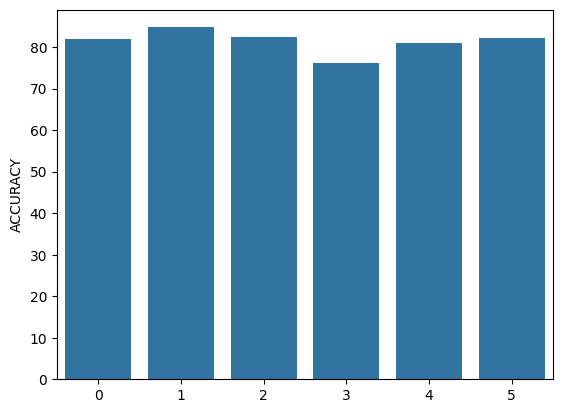

In [62]:
sns.barplot(final['ACCURACY'])

###               SAVING THE MODEL

In [63]:
import joblib

In [64]:
joblib.dump(rf,'Wine Quality Predication')

['Wine Quality Predication']

In [65]:
#instance of the model
model= joblib.load('Wine Quality Predication')

## ----------------PREDICTION ON NEW DATA------------------------------

In [66]:
import pandas as pd
new_data1 = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,
},index=[0])

In [67]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [68]:
new_data1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [69]:
test = pca.transform(st.transform(new_data1))

In [70]:
p = model.predict(test)

In [71]:
if p[0] == 1: 
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Bad Quality Wine


In [72]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

## GUI

In [ ]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get()) 
    p10=float(e10.get())
    p11=float(e11.get())
    model = joblib.load('Wine Quality Predication')
    result=model.predict(pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11]])))
    
    if result[0] == 0:
        Label(master, text="Bad Quality Wine").grid(row=31)
    else:
        Label(master, text="Good Quality Wine").grid(row=31)
    
    
master = Tk()
master.title("Wine Quality Prediction Using Machine Learning")


label = Label(master, text = "Wine Quality Prediction Using MACHINE LEARNING!"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master,text="alcohol").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


================================================THANKYOU===============================================

for queries mail at: ranisoni6298@gmail.com